# Importing Libraries & Data

In [2]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
("encoding", OneHotEncoder(handle_unknown="ignore"))


('encoding', OneHotEncoder(handle_unknown='ignore'))

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [7]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/datacamp/courses-introduction-to-python/master/datasets/baseball.csv")


In [9]:
df.head()

,Name,Team,Position,Height,Weight,Age,PosCategory
0,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
1,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
2,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
3,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
4,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1015 non-null   object 
 1   Team         1015 non-null   object 
 2   Position     1015 non-null   object 
 3   Height       1015 non-null   int64  
 4   Weight       1015 non-null   int64  
 5   Age          1015 non-null   float64
 6   PosCategory  1015 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 55.6+ KB


In [11]:
df.describe()

,Height,Weight,Age
count,1015.00,1015.00,1015.00
mean,73.69,201.35,28.71
std,2.31,20.82,4.31
min,67.00,150.00,20.90
25%,72.00,186.00,25.41
50%,74.00,200.00,27.90
75%,75.00,215.00,31.19
max,83.00,290.00,48.52


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1015 non-null   object 
 1   Team         1015 non-null   object 
 2   Position     1015 non-null   object 
 3   Height       1015 non-null   int64  
 4   Weight       1015 non-null   int64  
 5   Age          1015 non-null   float64
 6   PosCategory  1015 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 55.6+ KB


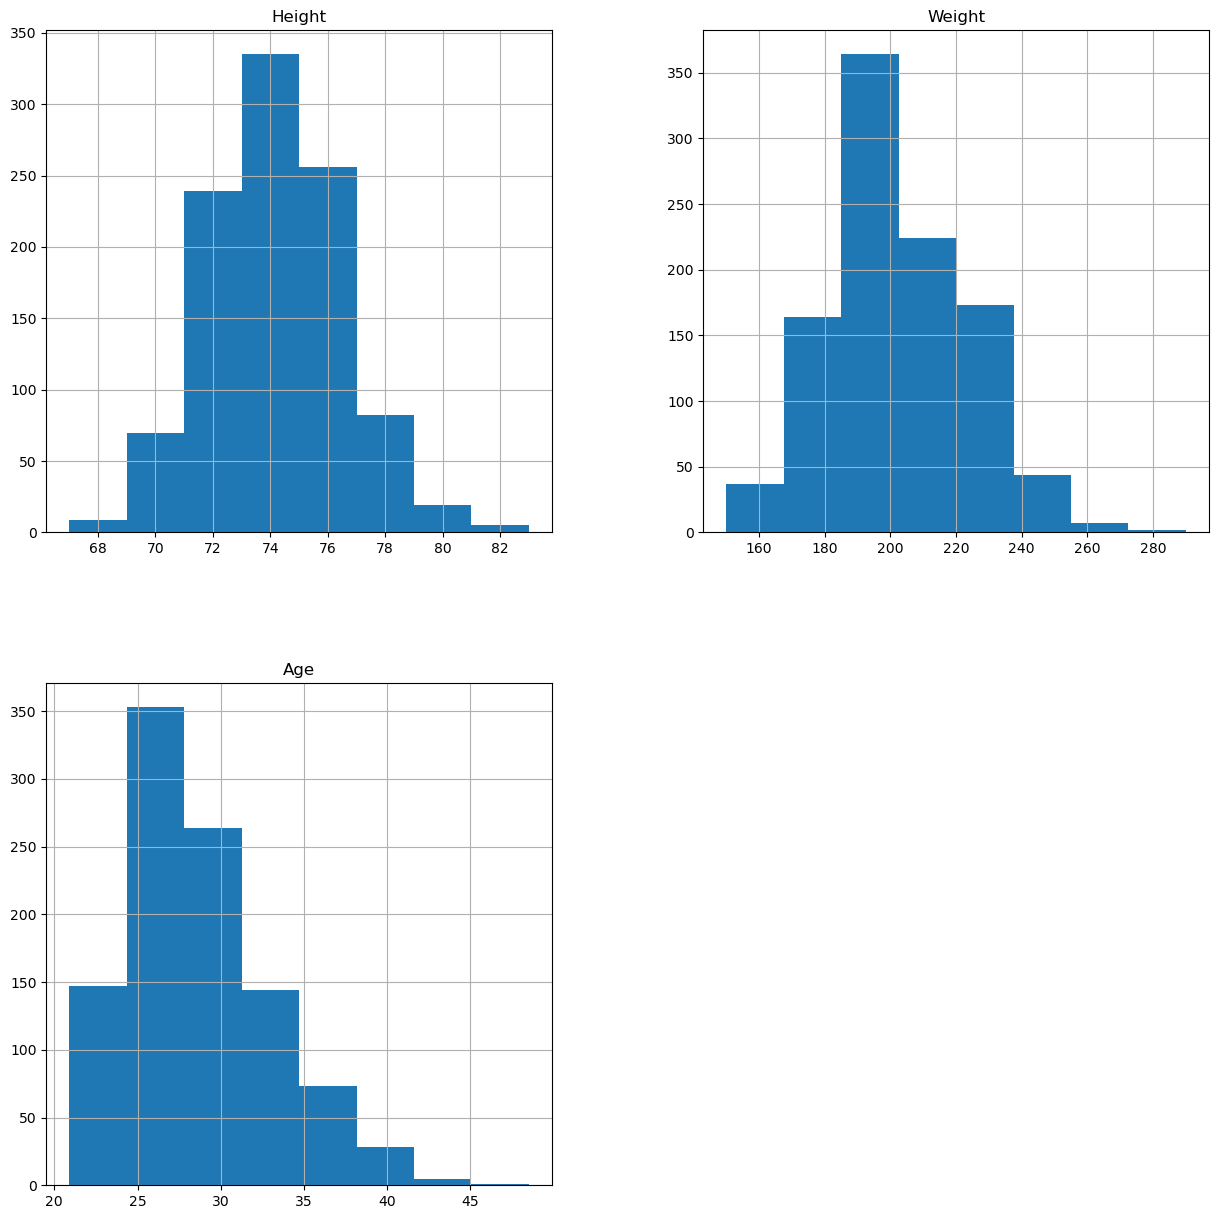

In [13]:
df.hist(bins=8,figsize=(15,15));

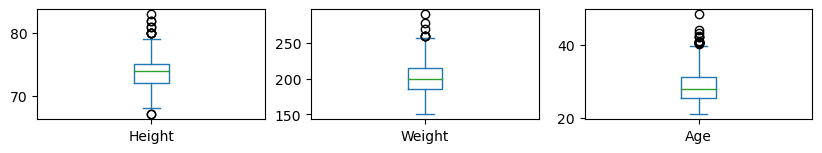

In [14]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10));

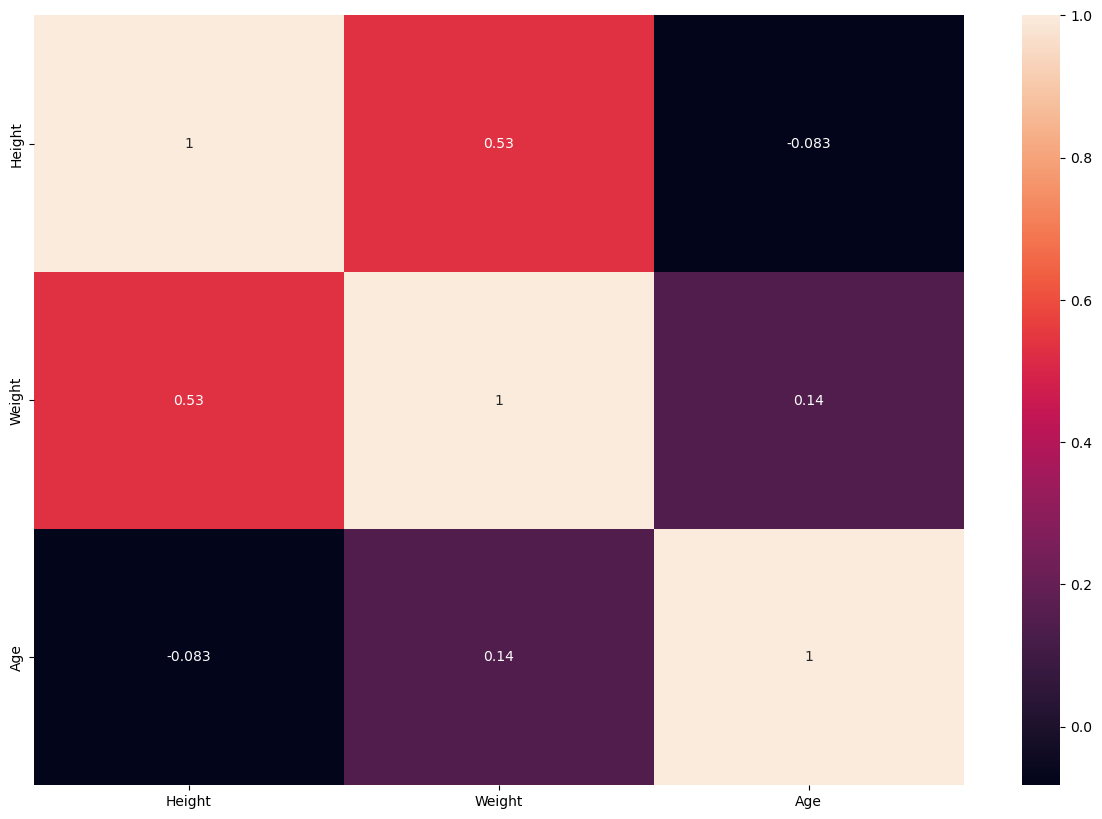

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [16]:
# Assigning Feature & Target Data

x = df.drop(['Height'], axis=1)
y = df[['Height']]

In [17]:
df.describe()

,Height,Weight,Age
count,1015.00,1015.00,1015.00
mean,73.69,201.35,28.71
std,2.31,20.82,4.31
min,67.00,150.00,20.90
25%,72.00,186.00,25.41
50%,74.00,200.00,27.90
75%,75.00,215.00,31.19
max,83.00,290.00,48.52


In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

In [19]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(reg_models)

NameError: name 'LazyRegressor' is not defined

In [20]:
from sklearn.linear_model import Ridge
r_clf = Ridge(random_state = 39)

In [26]:
r_clf.fit(xtrain,ytrain)

ValueError: could not convert string to float: 'John_Maine'

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_param = {'alpha':[0.0001,0.001,0.01,0.1,1,10], 
              'fit_intercept': [True,False], 
              'copy_X': [True , False], 
              'tol':[0.0001,0.001,0.01,0.1,1,10]}

In [23]:
grid_search = GridSearchCV(estimator=r_clf, param_grid=grid_param, cv=2, verbose=3)

In [24]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=nan total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=nan total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=nan total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=1;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=Tr

ValueError: 
All the 288 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1242, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Shawn_Chacon'

--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1242, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'John_Maine'


In [25]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [27]:
Final_model = Ridge(alpha=10, copy_X=True, fit_intercept=True, tol=0.0001)
Final_model.fit(xtrain, ytrain)

ValueError: could not convert string to float: 'John_Maine'

In [28]:
from sklearn.metrics import r2_score

rd_pred= Final_model.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score: ', r2s*100)

ValueError: could not convert string to float: 'Jeremy_Reed'